Chapter 20

# 轮廓图
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# ! pip install yellowbrick
# ! pip install --upgrade threadpoolctl

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap

In [3]:
# Create color maps
rgb = [[255, 238, 255],  # red
       [219, 238, 244],  # blue
       [228, 228, 228]]  # black
rgb = np.array(rgb)/255.

cmap_light = ListedColormap(rgb)

In [4]:
# import the iris data
iris = datasets.load_iris()

# Only use the first two features: sepal length, sepal width
X = iris.data[:, :2]

plot_step = 0.02
xx, yy = np.meshgrid(np.arange(4, 8+plot_step, plot_step),
                     np.arange(1.5, 4.5+plot_step, plot_step))

range_n_clusters = [3, 4, 5]

C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.4450525692083638


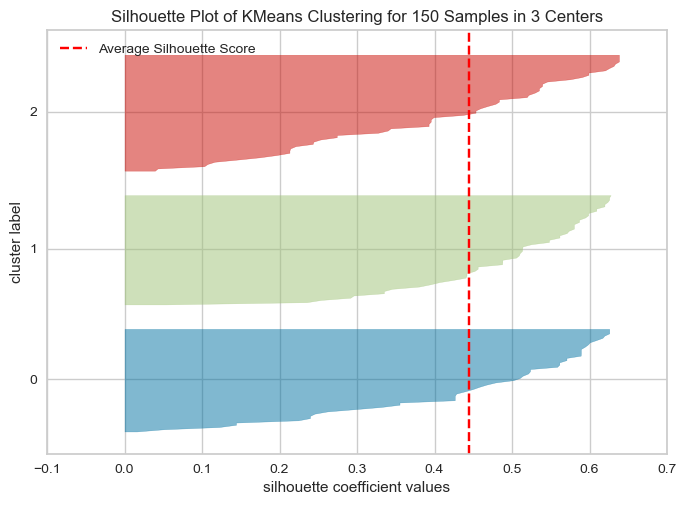

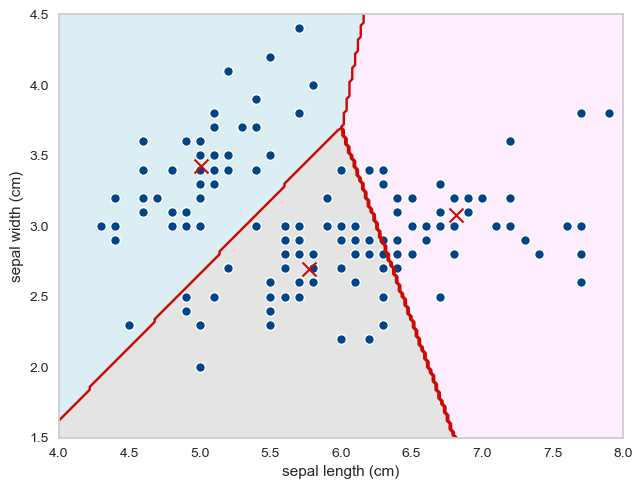

For n_clusters = 4 The average silhouette_score is : 0.41863471679551184


C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


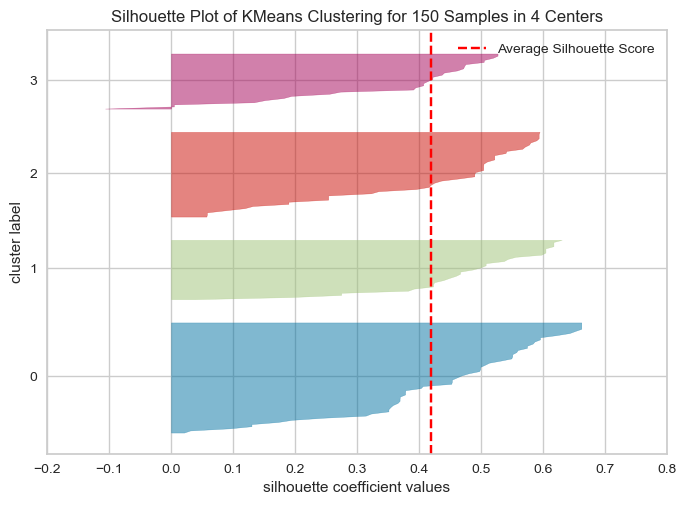

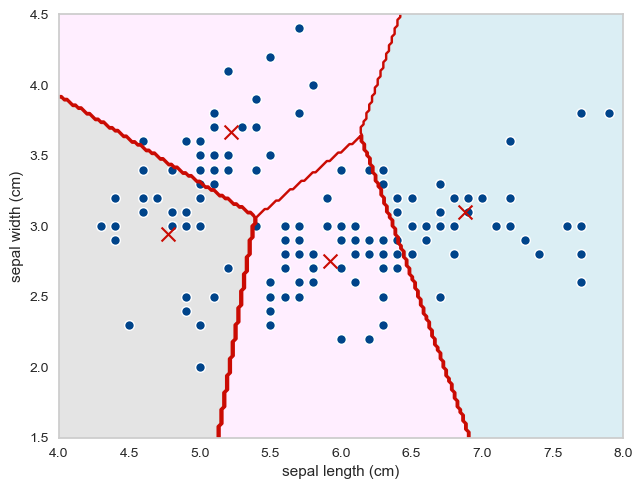

For n_clusters = 5 The average silhouette_score is : 0.41591694093833986


C:\Users\james\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


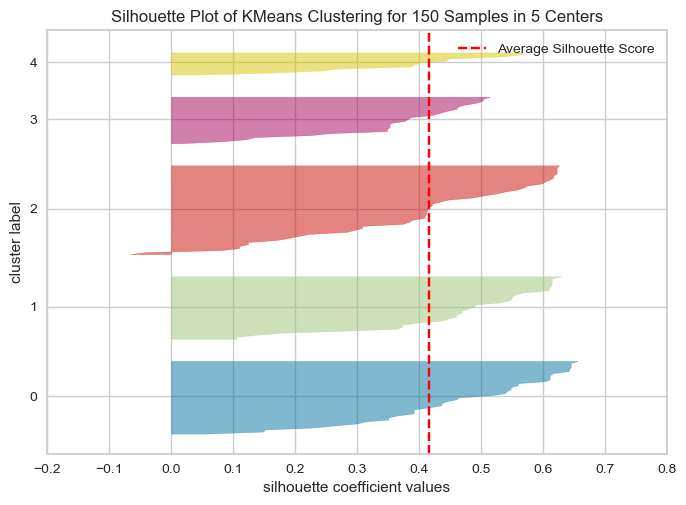

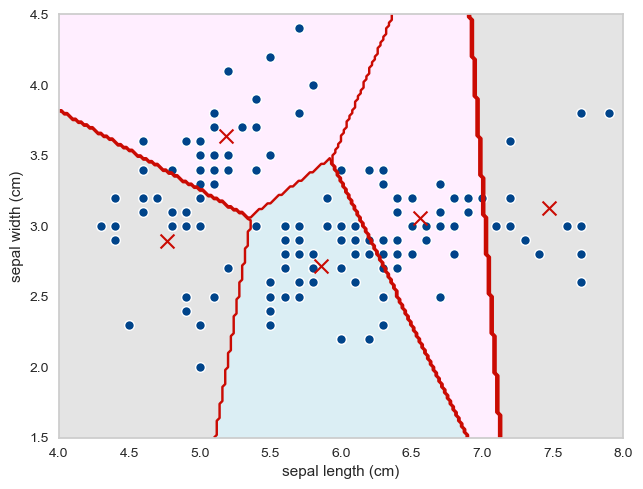

In [5]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax= plt.subplots()

    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    
    visualizer.fit(X)
    # Fit the data to the visualizer
    visualizer.show()
    # Finalize and render the figure

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Generate mesh

    # predict clusters
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    fig, ax = plt.subplots()
    
    plt.plot(centers[0,:],centers[1,:],'x')
    # plot regions
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    
    # plot sample data
    plt.scatter(x=X[:, 0], y=X[:, 1], color=np.array([0, 68, 138])/255., alpha=1.0, 
                    linewidth = 1, edgecolor=[1,1,1])
    
    # plot decision boundaries
    levels = np.unique(Z).tolist();
    plt.contour(xx, yy, Z, levels=levels,colors='r')
    
    # plot centroids
    centroids = kmeans.cluster_centers_
    
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1.5,
                color="r")
    ax.set_xticks(np.arange(4, 8.5, 0.5))
    ax.set_yticks(np.arange(1.5, 5, 0.5))
    ax.set_xlim(4, 8)
    ax.set_ylim(1.5, 4.5)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_aspect('equal')
    plt.show()